<a href="https://colab.research.google.com/github/hrtywhy/Machine-Learning/blob/main/Random-Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd 
import numpy as np

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
UDPLag = pd.read_csv ('/content/drive/My Drive/Dataset/skripsi/2/UDPLag.csv')
Syn = pd.read_csv ('/content/drive/My Drive/Dataset/skripsi/2/Syn.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data = pd.concat([Syn, UDPLag], ignore_index = True)

In [15]:
data.shape

(1953286, 88)

In [16]:
data[' Label'].value_counts()

Syn        1582289
UDP-lag     366461
BENIGN        4097
WebDDoS        439
Name:  Label, dtype: int64

In [17]:
data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [18]:
data_real = data.replace(np.inf, np.nan)

In [19]:
data_real.isnull().sum().sum()

477440

In [20]:
data_df = data_real.dropna(axis=0)

In [21]:
data_df.isnull().sum().sum()

0

In [22]:
data_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.813482e-01,5.789965e+06,7.370247e+06,21714933.0,0.0,115799309.0,6.433295e+06,7.505277e+06,21714933.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,380,0,0,0,0,0,0,19,0,2,0,5840,0,0,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.403830e-01,7.598262e+06,8.575157e+06,20019405.0,0.0,113973933.0,7.598262e+06,8.575157e+06,20019405.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.571429e+04,3.733333e+01,6.379916e+01,111.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,2,0,5840,0,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.509648e-01,7.065667e+06,8.074003e+06,20954123.0,1.0,105985004.0,7.065667e+06,8.074003e+06,20954123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,236819,172.16.0.5-192.168.50.1-60489-27808-6,172.16.0.5,60489,192.168.50.1,27808,6,2018-12-01 13:30:30.739595,1,2,0,0

In [23]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [24]:
data_X.columns 

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [25]:
data_X.shape 

(1714566, 86)

In [26]:
data_y = data_df[' Label']

In [27]:
data_y.shape 

(1714566,)

In [28]:
data_df.isnull().sum().sum()

0

In [29]:
data_y.unique()

array(['Syn', 'BENIGN', 'UDP-lag', 'WebDDoS'], dtype=object)

In [30]:
data_X 

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.813482e-01,5.789965e+06,7.370247e+06,21714933.0,0.0,115799309.0,6.433295e+06,7.505277e+06,21714933.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,380,0,0,0,0,0,0,19,0,2,0,5840,0,0,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.403830e-01,7.598262e+06,8.575157e+06,20019405.0,0.0,113973933.0,7.598262e+06,8.575157e+06,20019405.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.571429e+04,3.733333e+01,6.379916e+01,111.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,2,0,5840,0,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.509648e-01,7.065667e+06,8.074003e+06,20954123.0,1.0,105985004.0,7.065667e+06,8.074003e+06,20954123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,236819,172.16.0.5-192.168.50.1-60489-27808-6,172.16.0.5,60489,192.168.50.1,27808,6,2018-1

In [31]:
from sklearn.preprocessing import LabelEncoder 

In [32]:
le = LabelEncoder()

In [33]:
data_y_trans = le.fit_transform(data_y)

In [34]:
data_y_trans

array([1, 1, 1, ..., 2, 2, 2])

In [35]:
le_fid = LabelEncoder()

In [36]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [37]:
le_SIP = LabelEncoder()

In [38]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [39]:
le_DIP = LabelEncoder()

In [40]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [41]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [42]:
data_X

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,281052,1039535,7,53058,57,53058,6,334198,115799309,19,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.813482e-01,5.789965e+06,7.370247e+06,21714933.0,0.0,115799309.0,6.433295e+06,7.505277e+06,21714933.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,380,0,0,0,0,0,0,19,0,2,0,5840,0,0,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,450424,520499,7,32237,57,32237,6,334199,113973933,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.403830e-01,7.598262e+06,8.575157e+06,20019405.0,0.0,113973933.0,7.598262e+06,8.575157e+06,20019405.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,182979,1241636,7,60495,57,9840,6,334200,112,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.571429e+04,3.733333e+01,6.379916e+01,111.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,2,0,5840,0,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,41540,1219246,7,59724,57,59724,6,334201,105985004,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.509648e-01,7.065667e+06,8.074003e+06,20954123.0,1.0,105985004.0,7.065667e+06,8.074003e+06,20954123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,358711,1241654,7,60496,57,32538,6,334202,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,236819,1241302,7,60489,57,27808,6,334193,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
1953281,350624,1241360,7,60490,57,14102,6,334194,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [43]:
data_X.dtypes

Unnamed: 0           int64
Flow ID              int64
 Source IP           int64
 Source Port         int64
 Destination IP      int64
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
 Inbound             int64
Length: 86, dtype: object

In [44]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [45]:
model.feature_importances_

array([9.54175609e-02, 1.17610455e-02, 2.02067304e-03, 1.20076033e-02,
       1.03706952e-03, 1.02502007e-02, 1.94204230e-02, 6.29753096e-01,
       2.47439436e-02, 8.15022525e-03, 2.74275600e-04, 1.81691464e-03,
       9.02409460e-05, 5.68516123e-03, 5.58503227e-03, 5.54544526e-03,
       9.34366782e-04, 1.26964058e-04, 1.16317671e-04, 1.28788939e-04,
       1.09437890e-04, 2.79371736e-03, 2.67648325e-03, 4.14764305e-03,
       5.83811263e-03, 3.87343206e-03, 5.28659782e-04, 2.50433306e-02,
       7.22853461e-03, 2.45106689e-03, 7.84511023e-03, 3.47372752e-04,
       4.59315295e-04, 3.01141885e-04, 1.55803744e-04, 4.46509002e-04,
       2.16121994e-04, 1.05610015e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.88302064e-03, 3.77405091e-04, 3.09504003e-03,
       9.35458070e-04, 8.40910652e-03, 3.68036525e-03, 1.13675224e-02,
       9.63318521e-05, 6.25899861e-05, 0.00000000e+00, 4.69985104e-05,
       1.41295243e-04, 0.00000000e+00, 1.88193715e-02, 7.69627317e-04,
      

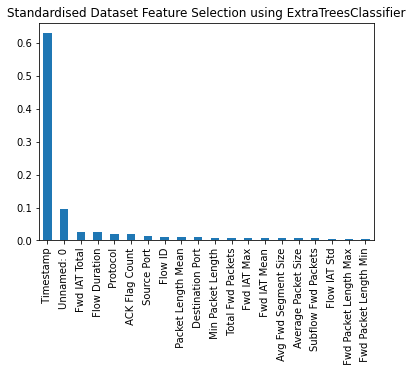

In [46]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [47]:
data_X.shape 

(1714566, 86)

In [48]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [49]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,334198,53058,0.0,0.0,1039535,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.640770e-01,1.813482e-01,0.0,0,53058,0
1,334199,32237,0.0,0.0,520499,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.403830e-01,1.403830e-01,0.0,0,32237,0
2,334200,60495,0.0,0.0,1241636,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.785714e+04,3.571429e+04,0.0,0,9840,0
3,334201,59724,0.0,0.0,1219246,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.509648e-01,1.509648e-01,0.0,0,59724,0
4,334202,60496,0.0,0.0,1241654,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,32538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,334193,60489,0.0,0.0,1241302,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,27808,0
1953281,334194,60490,0.0,0.0,1241360,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,14102,0
1953282,334195,60491,0.0,0.0,1241439,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,58360,0
1953283,334196,60492,0.0,0.0,1241462,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.000000e+06,1.000000e+06,0.0,0,2905,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [51]:
X_train.shape 

(1200196, 86)

In [52]:
X_test.shape 

(514370, 86)

In [53]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [54]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [56]:
X_train_std_20.shape 

(1200196, 20)

In [57]:
y_train_20.shape

(1200196,)

In [58]:
X_test_std_20.shape 

(514370, 20)

In [59]:
y_test_20.shape 

(514370,)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier()

In [61]:
rf_y_pred = rf.predict(X_test_std_20)

In [62]:
rf_y_pred

array([2, 1, 2, ..., 2, 1, 2])

In [63]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [64]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

      BENIGN       1.00      0.99      1.00      1197
         Syn       1.00      1.00      1.00    413754
     UDP-lag       1.00      1.00      1.00     99286
     WebDDoS       0.98      0.94      0.96       133

    accuracy                           1.00    514370
   macro avg       1.00      0.98      0.99    514370
weighted avg       1.00      1.00      1.00    514370



In [65]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[  1191      4      2      0]
 [     3 413751      0      0]
 [     0    127  99157      2]
 [     1      0      7    125]]


In [66]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.97161576297218


In [71]:
# RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'Syn', 'UDP-lag',]
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()


In [72]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

In [73]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

IndexError: ignored